Decision Tree Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('titanic (2).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\loalo\AppData\Local\Temp\ipykernel_7780\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\loalo\AppData\Local\Temp\ipykernel_7780\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [11]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}


In [13]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
default_model = DecisionTreeClassifier(random_state=42)
default_model.fit(X_train, y_train)
default_preds = default_model.predict(X_test)
default_acc = accuracy_score(y_test, default_preds)

In [15]:
tuned_preds = best_model.predict(X_test)
tuned_acc = accuracy_score(y_test, tuned_preds)

In [16]:
print(f"Default Model Accuracy: {default_acc:.4f}")
print(f"Tuned Model Accuracy: {tuned_acc:.4f}")

Default Model Accuracy: 0.7821
Tuned Model Accuracy: 0.7989


In [17]:
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, tuned_preds))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



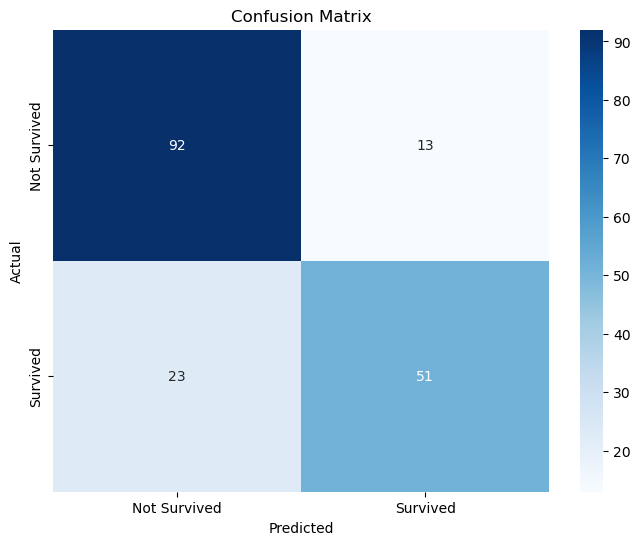

In [18]:
conf_matrix = confusion_matrix(y_test, tuned_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()